In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [48]:
train = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\wazihub\Train.csv')
Context_Data_Maize = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\wazihub\Context_Data_Maize.csv')
Context_Data_Peanuts = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\wazihub\Context_Data_Peanuts.csv')
SampleSubmission = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\wazihub\SampleSubmission.csv')

In [49]:
soilhumidity1 = train[['timestamp','Soil humidity 1', 'Irrigation field 1']]
soilhumidity2 = train[['timestamp','Soil humidity 2', 'Irrigation field 2']]
soilhumidity3 = train[['timestamp','Soil humidity 3', 'Irrigation field 3']]
soilhumidity4 = train[['timestamp','Soil humidity 4', 'Irrigation field 4']]

In [50]:
soil_humidity1 = soilhumidity1.dropna(axis= 0)
soil_humidity2 = soilhumidity2.dropna(axis= 0)
soil_humidity3 = soilhumidity3.dropna(axis= 0)
soil_humidity4 = soilhumidity4.dropna(axis= 0)

In [51]:
soil_humidity1 = soil_humidity1.rename(columns= {'Soil humidity 1':'Soil humidity','Irrigation field 1':'Irrigation field'})
soil_humidity2 = soil_humidity2.rename(columns= {'Soil humidity 2':'Soil humidity','Irrigation field 2':'Irrigation field'})
soil_humidity3 = soil_humidity3.rename(columns= {'Soil humidity 3':'Soil humidity','Irrigation field 3':'Irrigation field'})
soil_humidity4 = soil_humidity4.rename(columns= {'Soil humidity 4':'Soil humidity','Irrigation field 4':'Irrigation field'})

In [52]:
soil_humidity1['type_soil_humidity'] = 'Soil humidity 1'
soil_humidity2['type_soil_humidity'] = 'Soil humidity 2'
soil_humidity3['type_soil_humidity'] = 'Soil humidity 3'
soil_humidity4['type_soil_humidity'] = 'Soil humidity 4'

In [53]:
frame = [soil_humidity1,soil_humidity2,soil_humidity3,soil_humidity4]
df_train = pd.concat(frame)

In [54]:
df_train.head()

,timestamp,Soil humidity,Irrigation field,type_soil_humidity
0,2019-02-23 00:00:00,67.92,0.0,Soil humidity 1
1,2019-02-23 00:05:00,67.89,0.0,Soil humidity 1
2,2019-02-23 00:10:00,67.86,0.0,Soil humidity 1
3,2019-02-23 00:15:00,67.84,0.0,Soil humidity 1
4,2019-02-23 00:20:00,67.81,0.0,Soil humidity 1


In [55]:
SampleSubmission.head()

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,NaN
1,2019-03-25 22:55:00 x Soil humidity 1,NaN
2,2019-03-25 23:00:00 x Soil humidity 1,NaN
3,2019-03-25 23:05:00 x Soil humidity 1,NaN
4,2019-03-25 23:10:00 x Soil humidity 1,NaN


In [56]:
import datetime
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train["dayofweek"]=df_train["timestamp"].dt.dayofweek
df_train["dayofyear"]=df_train["timestamp"].dt.dayofyear
df_train["dayofmonth"]=df_train["timestamp"].dt.day
df_train["week"]=df_train["timestamp"].dt.week
df_train["hour"]=df_train["timestamp"].dt.hour
df_train["minute"]=df_train["timestamp"].dt.minute
df_train["is_weekend"]=df_train["dayofweek"].apply( lambda df_train : 1 if df_train  in [5,6] else 0 )
df_train["year"]=df_train["timestamp"].dt.year
df_train["quarter"]=df_train["timestamp"].dt.quarter
df_train["month"]=df_train["timestamp"].dt.month
df_train["second"]=df_train["timestamp"].dt.second
df_train["is_month_end"]=df_train["timestamp"].dt.is_month_end
df_train["is_month_start"]=df_train["timestamp"].dt.is_month_start
df_train["is_year_end"]=df_train["timestamp"].dt.is_year_end
df_train["is_year_start"]=df_train["timestamp"].dt.is_year_start


In [57]:
test = SampleSubmission
test['timestamp'],test['type_soil_humidity'] = test['ID'].str.split('x').str
test.head()

,ID,Values,timestamp,type_soil_humidity
0,2019-03-25 22:50:00 x Soil humidity 1,NaN,2019-03-25 22:50:00,Soil humidity 1
1,2019-03-25 22:55:00 x Soil humidity 1,NaN,2019-03-25 22:55:00,Soil humidity 1
2,2019-03-25 23:00:00 x Soil humidity 1,NaN,2019-03-25 23:00:00,Soil humidity 1
3,2019-03-25 23:05:00 x Soil humidity 1,NaN,2019-03-25 23:05:00,Soil humidity 1
4,2019-03-25 23:10:00 x Soil humidity 1,NaN,2019-03-25 23:10:00,Soil humidity 1


In [58]:
test = test.drop(columns= ['ID','Values'], axis =1)

In [59]:
test['timestamp'] = pd.to_datetime(test['timestamp'])
test["dayofweek"]=test["timestamp"].dt.dayofweek
test["dayofyear"]=test["timestamp"].dt.dayofyear
test["dayofmonth"]=test["timestamp"].dt.day
test["week"]=test["timestamp"].dt.week
test["hour"]=test["timestamp"].dt.hour
test["minute"]=test["timestamp"].dt.minute
test["is_weekend"]=test["dayofweek"].apply( lambda test : 1 if test  in [5,6] else 0 )
test["year"]=test["timestamp"].dt.year
test["quarter"]=test["timestamp"].dt.quarter
test["month"]=test["timestamp"].dt.month
test["second"]=test["timestamp"].dt.second
test["is_month_end"]=test["timestamp"].dt.is_month_end
test["monis_month_startth"]=test["timestamp"].dt.is_month_start
test["is_year_end"]=test["timestamp"].dt.is_year_end
test["is_year_start"]=test["timestamp"].dt.is_year_start

In [60]:
df_train["type_soil_humidity"] = pd.Categorical(df_train["type_soil_humidity"])
ProductCat_categories = df_train.type_soil_humidity.cat.categories
df_train["type_soil_humidity"] = df_train.type_soil_humidity.cat.codes

test["type_soil_humidity"] = pd.Categorical(test["type_soil_humidity"])
ProductCat_categories = test.type_soil_humidity.cat.categories
test["type_soil_humidity"] = test.type_soil_humidity.cat.codes

In [61]:
df_train["is_month_end"] = pd.Categorical(df_train["is_month_end"])
ProductCat_categories = df_train.is_month_end.cat.categories
df_train["is_month_end"] = df_train.is_month_end.cat.codes

test["is_month_end"] = pd.Categorical(test["is_month_end"])
ProductCat_categories = test.is_month_end.cat.categories
test["is_month_end"] = test.is_month_end.cat.codes

In [62]:
df_train["year"] = pd.Categorical(df_train["year"])
ProductCat_categories = df_train.year.cat.categories
df_train["year"] = df_train.year.cat.codes

test["year"] = pd.Categorical(test["year"])
ProductCat_categories = test.year.cat.categories
test["year"] = test.year.cat.codes

In [63]:
Context_Data_Maize

,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
0,6-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
1,7-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
2,8-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
3,9-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
4,10-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
5,11-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
6,12-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
7,13-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
8,14-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
9,15-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN


In [64]:
# ###obaby
# Context_Data_Maize['monthdata'] = Context_Data_Maize.Date.astype(str).apply(lambda x: x.split("-")[1])

# Context_Data_Maize['dayofmonth'] = Context_Data_Maize.Date.astype(str).apply(lambda x: x.split("-")[0])

In [65]:
# ntrain = df_train.shape[0]
# ntest = test.shape[0]

# all_data = pd.concat((df_train, test)).reset_index(drop=True)
# print("all_data size is : {}".format(all_data.shape))

# data = all_data.copy()

In [66]:
# data['issue_dt'] = pd.to_datetime(data.timestamp)


In [67]:
# data['dayofmonth'] = data['issue_dt'].dt.day


In [68]:
# def month(a):
#     if data["month"] == 2:
#         return "Feb"
#     elif data["month"] == 3:
#         return "Mar"
#     elif data["month"] == 4:
#         return "Apr"
#     elif data["month"] == 5:
#         return "May"

# # Define a function to map the values 
# def set_value(row_number, assigned_value): 
#     return assigned_value[row_number] 
  
# # Create the dictionary 
# event_dictionary ={2:'Feb',3: 'Mar', 4:'Apr', 5:'May'} 
  
# # Add a new column named 'Price' 
# data['monthdata'] = data['month'].apply(set_value, args =(event_dictionary, ))  
# Context_Data_Maize.dayofmonth = Context_Data_Maize.dayofmonth.astype(int)

In [69]:
Context_Data_Maize

,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
0,6-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
1,7-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
2,8-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
3,9-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
4,10-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
5,11-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
6,12-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
7,13-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
8,14-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN
9,15-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,0.0,NaN,NaN,NaN


In [70]:
# data  = pd.merge(data,Context_Data_Maize,on = ["monthdata","dayofmonth"],how = "left")

In [71]:
# data.drop(["dayofmonth","issue_dt"],axis = 1,inplace = True)

In [72]:
# data.head()

In [73]:
# data = pd.get_dummies(data)

In [74]:

# #Get the new dataset
# df_train = data[:ntrain]
# test = data[ntrain:]

In [75]:
# df_train.fillna(df_train.mean(),inplace= True)

In [76]:
# test.fillna(0,inplace= True)

In [77]:
# test.isnull().sum()

In [78]:
# for i in range(len(df_train)):
#     if df_train.at[i,'month'] == 2:
#         df_train.at[i,'nmonth'] = 'Feb'
#     if df_train.at[i,'month'] == 3:
#         df_train.at[i,'nmonth'] = 'Mar'
#     if df_train.at[i,'month'] == 4:
#         df_train.at[i,'nmonth'] = 'Apr'
#     if df_train.at[i,'month'] == 5:
#         df_train.at[i,'nmonth'] = 'May'


In [79]:
# for i in range(len(test)):
#     if test.at[i,'month'] == 2:
#         test.at[i,'nmonth'] = 'Feb'
#     if test.at[i,'month'] == 3:
#         test.at[i,'nmonth'] = 'Mar'
#     if test.at[i,'month'] == 4:
#         test.at[i,'nmonth'] = 'Apr'
#     if test.at[i,'month'] == 5:
#         test.at[i,'nmonth'] = 'May'

In [80]:
# df_train.drop("Date", axis = 1,inplace = True)

In [81]:
# df_train.drop("monthdata", axis = 1,inplace = True)

In [84]:
df_train["Time_Of_Day"]=0
df_train.loc[df_train.hour.between(7,9) ,"Time_Of_Day"] = 1
df_train.loc[df_train.hour.between(10,15) ,"Time_Of_Day"]=2
df_train.loc[df_train.hour.between(16,18) ,"Time_Of_Day"]=3
df_train.loc[df_train.hour.isin([19,20,21,22,23]) ,"Time_Of_Day"]=4
df_train.loc[df_train.hour.between(0,6) ,"Time_Of_Day"]=5

In [85]:
test["Time_Of_Day"]=0
test.loc[test.hour.between(7,9) ,"Time_Of_Day"] = 1
test.loc[test.hour.between(10,15) ,"Time_Of_Day"]=2
test.loc[test.hour.between(16,18) ,"Time_Of_Day"]=3
test.loc[test.hour.isin([19,20,21,22,23]) ,"Time_Of_Day"]=4
test.loc[test.hour.between(0,6) ,"Time_Of_Day"]=5

In [86]:
df_train["12H_hour"]=df_train["hour"].apply(lambda x : 1 if 0<=x<12 else  0 )

In [87]:
test["12H_hour"]=test["hour"].apply(lambda x : 1 if 0<=x<12 else  0 )

In [88]:
X = df_train.drop(['timestamp','Soil humidity','Irrigation field','year','is_month_start','second','is_month_end'],axis =1)
y = df_train['Soil humidity']
y_hat = test.drop(['timestamp','year','second','is_month_end'],axis =1)

In [89]:
X.head()

,type_soil_humidity,dayofweek,dayofyear,dayofmonth,week,hour,minute,is_weekend,quarter,month,is_year_end,is_year_start,Time_Of_Day,12H_hour
0,0,5,54,23,8,0,0,1,1,2,False,False,5,1
1,0,5,54,23,8,0,5,1,1,2,False,False,5,1
2,0,5,54,23,8,0,10,1,1,2,False,False,5,1
3,0,5,54,23,8,0,15,1,1,2,False,False,5,1
4,0,5,54,23,8,0,20,1,1,2,False,False,5,1


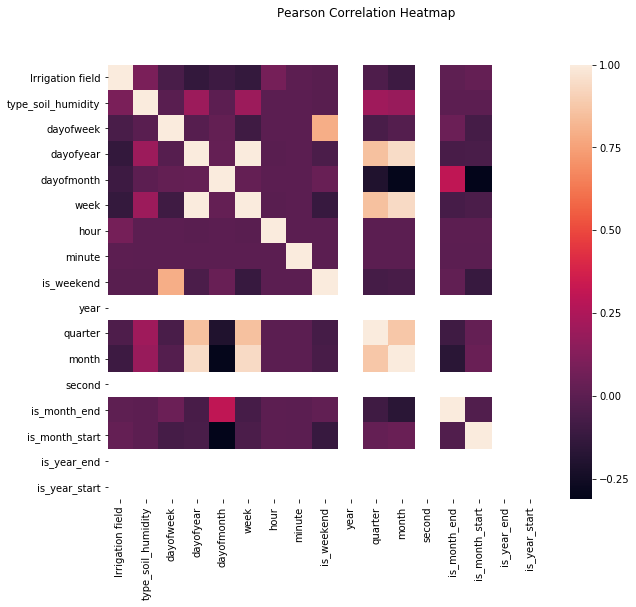

In [40]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.drop(['Soil humidity'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

In [41]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(X, y, test_size = 0.3, random_state = 6 )

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold,train_test_split,GridSearchCV
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

In [91]:
# best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
#                  gamma=0,                 
#                  learning_rate=0.07,
#                  max_depth=3,
#                  min_child_weight=1.5,
#                  n_estimators=10000,                                                                    
#                  reg_alpha=0.75,
#                  reg_lambda=0.45,
#                  subsample=0.6,
#                  seed=42)
# best_xgb_model.fit(train_x,train_y)
cate_features_index=np.where(X.dtypes != float) [0];
cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [92]:
X

,type_soil_humidity,dayofweek,dayofyear,dayofmonth,week,hour,minute,is_weekend,quarter,month,is_year_end,is_year_start,Time_Of_Day,12H_hour
0,0,5,54,23,8,0,0,1,1,2,False,False,5,1
1,0,5,54,23,8,0,5,1,1,2,False,False,5,1
2,0,5,54,23,8,0,10,1,1,2,False,False,5,1
3,0,5,54,23,8,0,15,1,1,2,False,False,5,1
4,0,5,54,23,8,0,20,1,1,2,False,False,5,1
5,0,5,54,23,8,0,25,1,1,2,False,False,5,1
6,0,5,54,23,8,0,30,1,1,2,False,False,5,1
7,0,5,54,23,8,0,35,1,1,2,False,False,5,1
8,0,5,54,23,8,0,40,1,1,2,False,False,5,1
9,0,5,54,23,8,0,45,1,1,2,False,False,5,1


In [110]:
# best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
#                  gamma=0,                 
#                  learning_rate=0.07,
#                  max_depth=3,
#                  min_child_weight=1.5,
#                  n_estimators=10000,                                                                    
#                  reg_alpha=0.75,
#                  reg_lambda=0.45,
#                  subsample=0.6,
#                  seed=42)
# best_xgb_model.fit(train_x,train_y)
from catboost import CatBoostRegressor
model = CatBoostRegressor(learning_rate= 0.2)

In [ ]:
cate_features_index = np.where(x.dtypes != float)[0];cate_features_index

In [123]:
from catboost import CatBoostRegressor
import catboost
model = CatBoostRegressor(iterations=500,
                              learning_rate=0.2,
                              depth=4,
                             l2_leaf_reg=10,
                             bootstrap_type='Bernoulli',
                              subsample=0.7,
                              #leaf_estimation_iterations=10,
                              metric_period=20,
                              #od_type='Iter',
                              #od_wait=45,
                              random_seed=42,
                              allow_writing_files=False)

In [124]:
X

,type_soil_humidity,dayofweek,dayofyear,dayofmonth,week,hour,minute,is_weekend,quarter,month,is_year_end,is_year_start,Time_Of_Day,12H_hour
0,0,5,54,23,8,0,0,1,1,2,False,False,5,1
1,0,5,54,23,8,0,5,1,1,2,False,False,5,1
2,0,5,54,23,8,0,10,1,1,2,False,False,5,1
3,0,5,54,23,8,0,15,1,1,2,False,False,5,1
4,0,5,54,23,8,0,20,1,1,2,False,False,5,1
5,0,5,54,23,8,0,25,1,1,2,False,False,5,1
6,0,5,54,23,8,0,30,1,1,2,False,False,5,1
7,0,5,54,23,8,0,35,1,1,2,False,False,5,1
8,0,5,54,23,8,0,40,1,1,2,False,False,5,1
9,0,5,54,23,8,0,45,1,1,2,False,False,5,1


In [125]:
# X = pd.get_dummies(X)
# y_hat = pd.get_dummies(y_hat)

In [126]:
model.fit(X,y)

0:	learn: 28.6151475	total: 93.6ms	remaining: 46.7s
20:	learn: 13.2687352	total: 1.21s	remaining: 27.6s
40:	learn: 11.9831931	total: 2.29s	remaining: 25.7s
60:	learn: 11.1801534	total: 3.39s	remaining: 24.4s
80:	learn: 10.6345162	total: 4.46s	remaining: 23.1s
100:	learn: 10.0481161	total: 5.54s	remaining: 21.9s
120:	learn: 9.6017559	total: 6.59s	remaining: 20.6s
140:	learn: 9.2961294	total: 7.71s	remaining: 19.6s
160:	learn: 8.9385589	total: 8.76s	remaining: 18.4s
180:	learn: 8.6452702	total: 9.83s	remaining: 17.3s
200:	learn: 8.3474030	total: 10.9s	remaining: 16.2s
220:	learn: 8.0731202	total: 12s	remaining: 15.1s
240:	learn: 7.8447608	total: 13.1s	remaining: 14.1s
260:	learn: 7.6370116	total: 14.2s	remaining: 13s
280:	learn: 7.3656495	total: 15.3s	remaining: 11.9s
300:	learn: 7.1891555	total: 16.4s	remaining: 10.8s
320:	learn: 6.9937108	total: 17.4s	remaining: 9.72s
340:	learn: 6.8376994	total: 18.5s	remaining: 8.63s
360:	learn: 6.6726556	total: 19.6s	remaining: 7.55s
380:	learn: 6.5

In [127]:
# best_xgb_model.fit(X,y)

In [128]:
y_hat = y_hat[X.columns]

In [129]:
test_dataset = SampleSubmission[['ID','Values']]

In [130]:
test_dataset['Values'] = model.predict(y_hat).astype('int64')
filename = 'vb.csv'
pd.DataFrame({'ID': test_dataset.ID, 'Values': test_dataset.Values}).to_csv(filename, index=False)

C:\Users\ABOFFICIAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
test_dataset

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,41
1,2019-03-25 22:55:00 x Soil humidity 1,41
2,2019-03-25 23:00:00 x Soil humidity 1,41
3,2019-03-25 23:05:00 x Soil humidity 1,41
4,2019-03-25 23:10:00 x Soil humidity 1,41
5,2019-03-25 23:15:00 x Soil humidity 1,41
6,2019-03-25 23:20:00 x Soil humidity 1,41
7,2019-03-25 23:25:00 x Soil humidity 1,41
8,2019-03-25 23:30:00 x Soil humidity 1,41
9,2019-03-25 23:35:00 x Soil humidity 1,41


In [100]:
test_dataset.to_csv("2ndjoin1.csv",index = False)

In [56]:
a  = pd.read_csv("das.csv")
b = pd.read_csv("join.csv")

In [43]:
a.Values  = a.Values*0.3 +b.Values*0.7


In [44]:
a.to_csv("2ndjoin1.csv",index = False)

In [57]:
a

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,38
1,2019-03-25 22:55:00 x Soil humidity 1,38
2,2019-03-25 23:00:00 x Soil humidity 1,38
3,2019-03-25 23:05:00 x Soil humidity 1,38
4,2019-03-25 23:10:00 x Soil humidity 1,38
...,...,...
5777,2019-05-31 07:25:00 x Soil humidity 4,10
5778,2019-05-31 07:30:00 x Soil humidity 4,8
5779,2019-05-31 07:35:00 x Soil humidity 4,8
5780,2019-05-31 07:40:00 x Soil humidity 4,8
